In [1]:
import numpy as np
# Note: all of this will be done with full-batch implementation. No regularization yet. No sparcity yet
import mnist_loader

import matplotlib.pyplot as plt
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

training_data = list(training_data)[:3]
unlabeled_data = np.array([data[0] for data in training_data])
data = unlabeled_data.T.reshape(784,-1) # each example stored in a column


In [23]:
def sigmoid(x):
	return 1/(1+np.exp(-x))

def sp(sigma):
	return sigma*(1-sigma)


def feedforward(x, w, b):  # Note: all of this will be done with full-batch implementation. No regularization yet. No sparcity yet
    # x should have examples in columns!
    a_hidden = sigmoid(np.dot(w,x)+b[0])
    a_out = sigmoid(np.dot(w.transpose(),a_hidden)+b[1])
    return [a_hidden, a_out] # Examples are still stored in columns in the hidden layer
# B's will work, I just need to be careful when I recreate images.

def backprop(x, w, b):
    a_hidden, a_out = feedforward(x,w,b)
    d_out = (a_out-x)*sp(a_out) # Using quad-cost for now
    d_hidden = np.dot(w,d_out)*sp(a_hidden)

    #dW_jk = a_k_l-1 * d_j
    dC_dw_T = np.dot(d_out, a_hidden.transpose())
    dC_dw_input = np.dot(d_hidden, x.transpose())

    dC_dw = dC_dw_input+dC_dw_T.transpose()
    dC_db = [np.sum(d_hidden, axis = 1).reshape(b[0].shape), np.sum(d_out, axis = 1).reshape(b[1].shape)] # put these in cells of a matrix
    return dC_dw, dC_db


def backpropsparse(x,w,b,rho,beta):
    a_hidden, a_out = feedforward(x,w,b)
    rho_hat = np.sum(a_hidden, axis = 1).reshape(len(a_hidden),1) # I'm pretty sure the dimension
    KL_deriv = (beta*(-(rho/rho_hat)+((1-rho)/(1-rho_hat)))).reshape(len(a_hidden),1)
    d_out = (a_out-x)*sp(a_out)
    d_hidden = (np.dot(w,d_out)+KL_deriv)*sp(a_hidden)
    
    #dW_jk = a_k_l-1 * d_j
    dC_dw_T = np.dot(d_out, a_hidden.transpose())
    dC_dw_input = np.dot(d_hidden, x.transpose())

    dC_dw = dC_dw_input+dC_dw_T.transpose()
    dC_db = [np.sum(d_hidden, axis = 1).reshape(b[0].shape), np.sum(d_out, axis = 1).reshape(b[1].shape)] # put these in cells of a matrix
    return dC_dw, dC_db, rho_hat

def update_net(x,w,b,rho = 0, beta = 0, sparse = 0):
    if sparse:
        dC_dw, dC_db, rho_hat = backpropsparse(x, w, b,rho,beta)
    else:
        dC_dw, dC_db = backprop(x, w, b)
        rho_hat = [0,0]
    # Using gradient descent
    w = w - dC_dw
    b[0] = b[0] - dC_db[0]
    b[1] = b[1] - dC_db[1]
    return w,b,rho_hat

def eval_err(data,w,b):
    prediction = feedforward(data,w,b)
    error = sum(sum((prediction[1] - data)**2))/(len(data))
    return error

# use this guy if not including sparcity term
def Grad_descent(data,w,b,iterations,sparse):
    for i in range(iterations):
        w,b = update_net(data,w,b)
        
        if i%499 == 0:
            print(eval_err(data,w,b))
    return w,b
        
def Grad_descent_sparse(data,w,b,iterations,sparse,rho = 0,beta = 0):
    rho_hat_avg = []
    for i in range(iterations):
        w,b,rho_hat = update_net(data,w,b,rho,beta,sparse)
        rho_hat_avg.append(sum(rho_hat)/len(rho_hat))
        if i%50 == 0:
            print(eval_err(data,w,b))    
    
    return w,b,rho_hat_avg



In [24]:
hidden_size = 50
sizes = [784,hidden_size,784]
b= [np.zeros((hidden_size,1)), np.zeros((784,1))]
w = np.random.randn(sizes[1],sizes[0])/np.sqrt(sizes[0])
rho = 0.05
beta = 0
# for i in range(1000):
#     w,b = update_net(data,w,b,rho,beta)

#     if i%499 == 0:
#         print(eval_err(data,w,b))
w,b,rho_hat_avg = Grad_descent_sparse(data,w,b,400,sparse = 0,rho = 0.1 ,beta = 1)
# This means it's not 
# w,b = Grad_descent(data,w,b,200,0)






0.14708233096
0.000490037813608
0.000270949082849
0.000196719679099
0.000155206189016
0.000128323495194
0.000109301181721
9.48311502303e-05


(784,)
(784, 1)


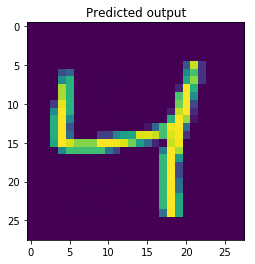

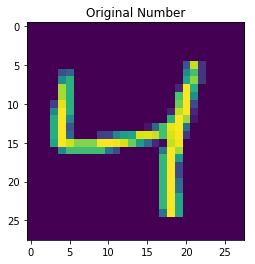

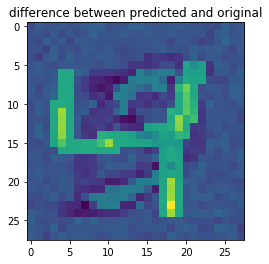

In [25]:
import matplotlib.pyplot as plt

digit = 2
output = feedforward(data.T[digit].reshape(784,1),w,b) # Have to transpose becasue egs are in columns.
print(data.T[0].shape)
output = np.array(output[1])
print(output.shape)

plt.imshow(np.array(output).reshape(28,28))
plt.title('Predicted output')
plt.show()

plt.figure()
plt.imshow(np.array(data.T[digit].reshape(28,28)))
plt.title('Original Number')
plt.show()

plt.figure()
plt.imshow(np.array(data.T[digit].reshape(28,28))-np.array(output).reshape(28,28))
plt.title('difference between predicted and original')
plt.show()

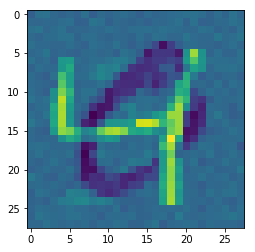

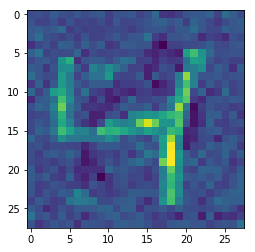

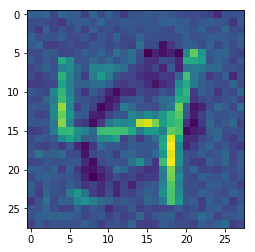

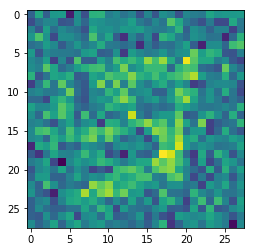

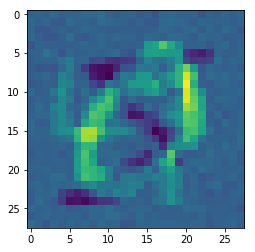

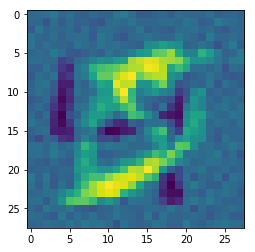

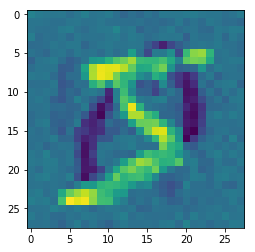

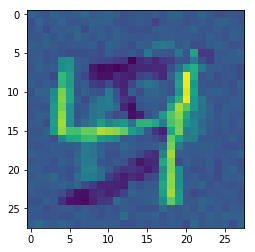

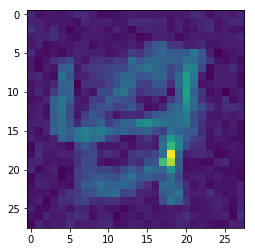

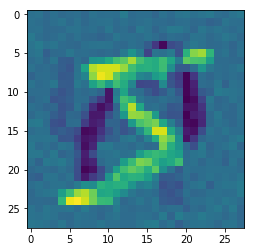

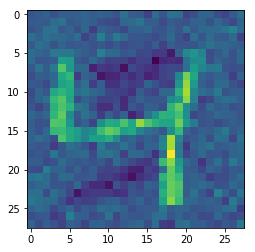

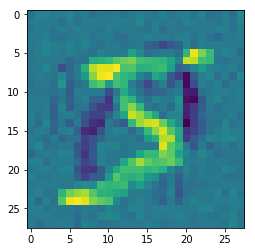

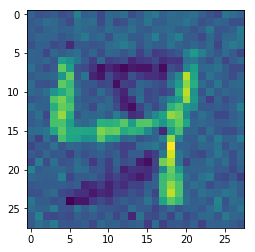

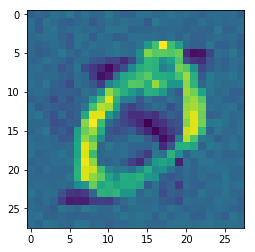

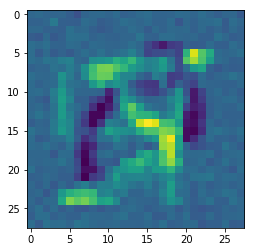

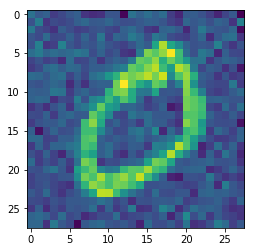

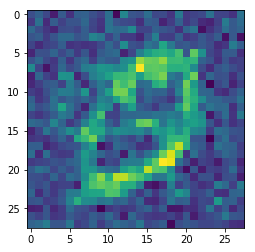

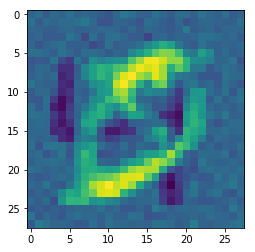

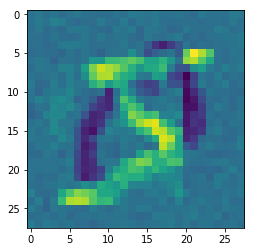

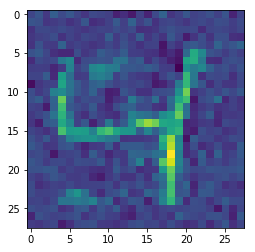

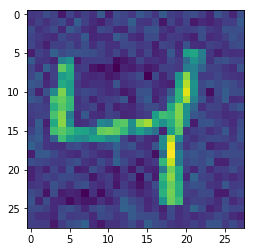

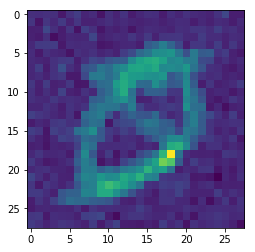

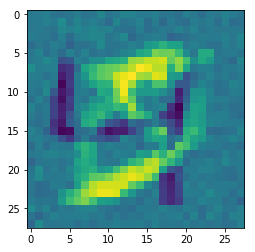

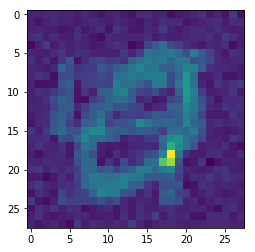

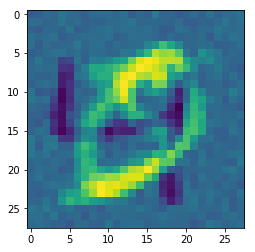

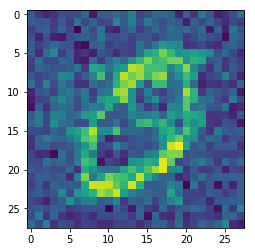

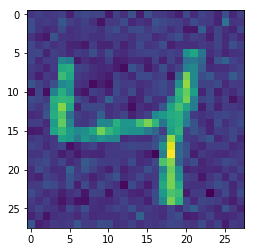

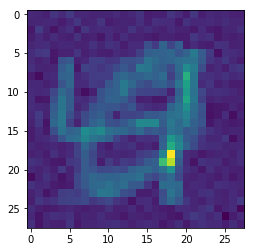

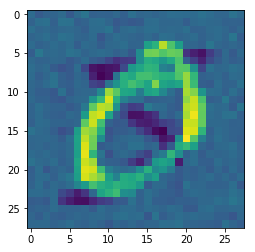

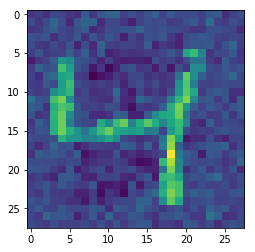

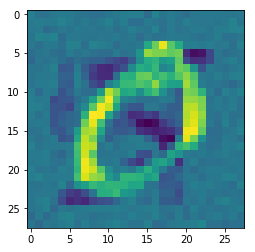

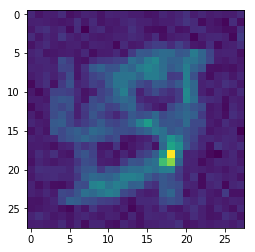

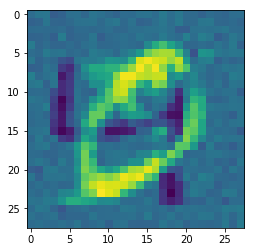

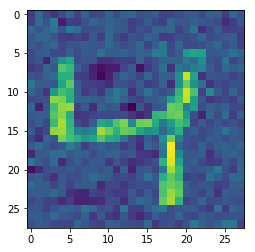

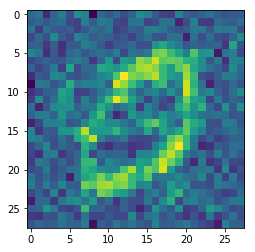

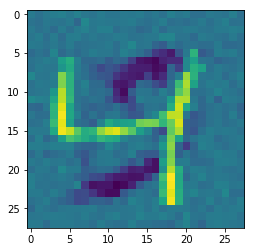

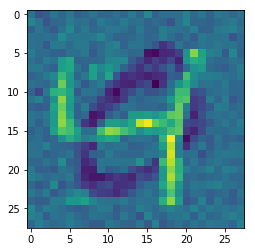

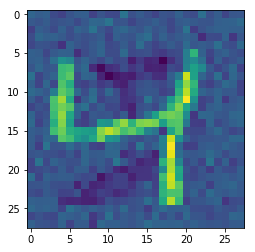

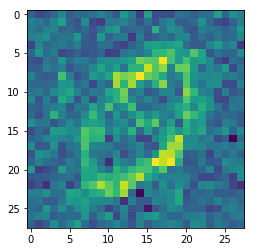

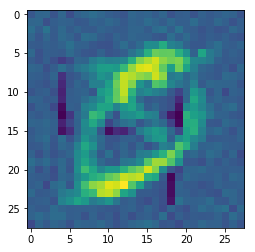

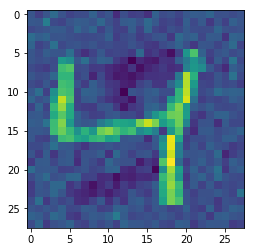

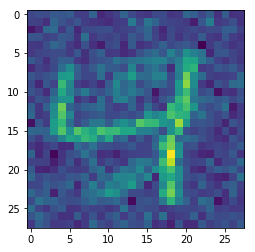

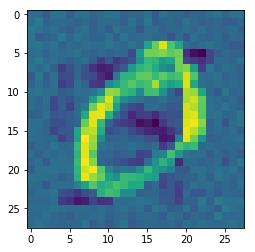

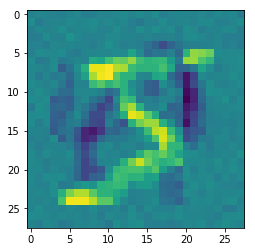

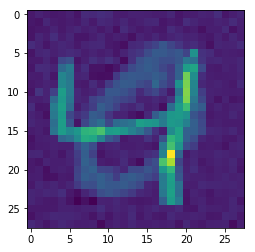

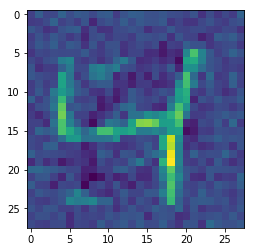

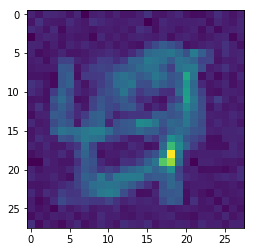

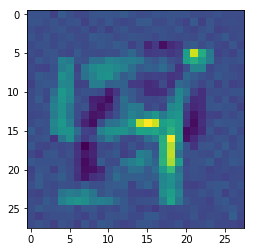

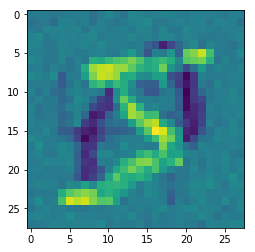

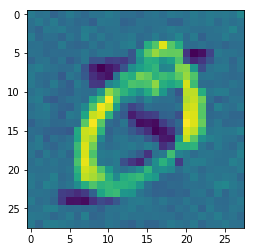

In [6]:
for row in w:
    plt.figure()
    plt.imshow(row.reshape(28,28), interpolation = 'nearest')
    plt.show()

